In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [10]:
#constants
bound = 2 #PLotting bounds for x and y axis
# Meshgrid 
x, y = np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(-bound, bound, 20)) 

#Vector directions for f plus and f minus
uplus = -1 + y
vplus = y - x
umin = -1 - y
vmin = x + y


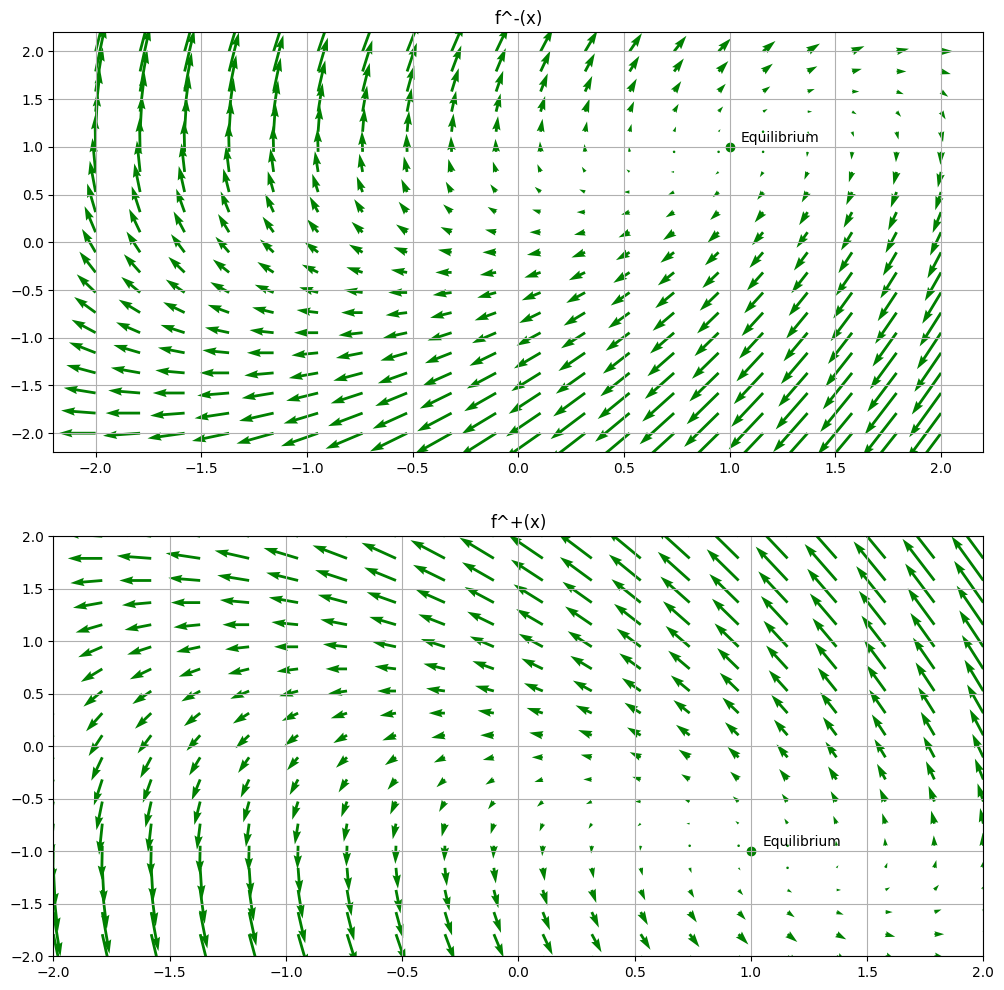

In [28]:
fig, axs = plt.subplots(2, 1, figsize =(12, 12))


# Plotting Vector Field  
axs[0].quiver(x, y, uplus, vplus, color='g') 
axs[0].set_title('f^-(x)') 
axs[0].grid(True)
axs[0].scatter([1], [1], color = 'g')
axs[0].annotate("Equilibrium", (1.05, 1.05))

# Plotting Vector Field  
axs[1].quiver(x, y, umin, vmin, color='g') 
axs[1].set_title('f^+(x)') 
axs[1].grid(True)
axs[1].scatter([1], [-1], color = 'g')
axs[1].annotate("Equilibrium", (1.05, -0.95))

# Setting x, y boundary limits 
plt.xlim(-bound, bound) 
plt.ylim(-bound, bound) 
  
# show plot
plt.show() 

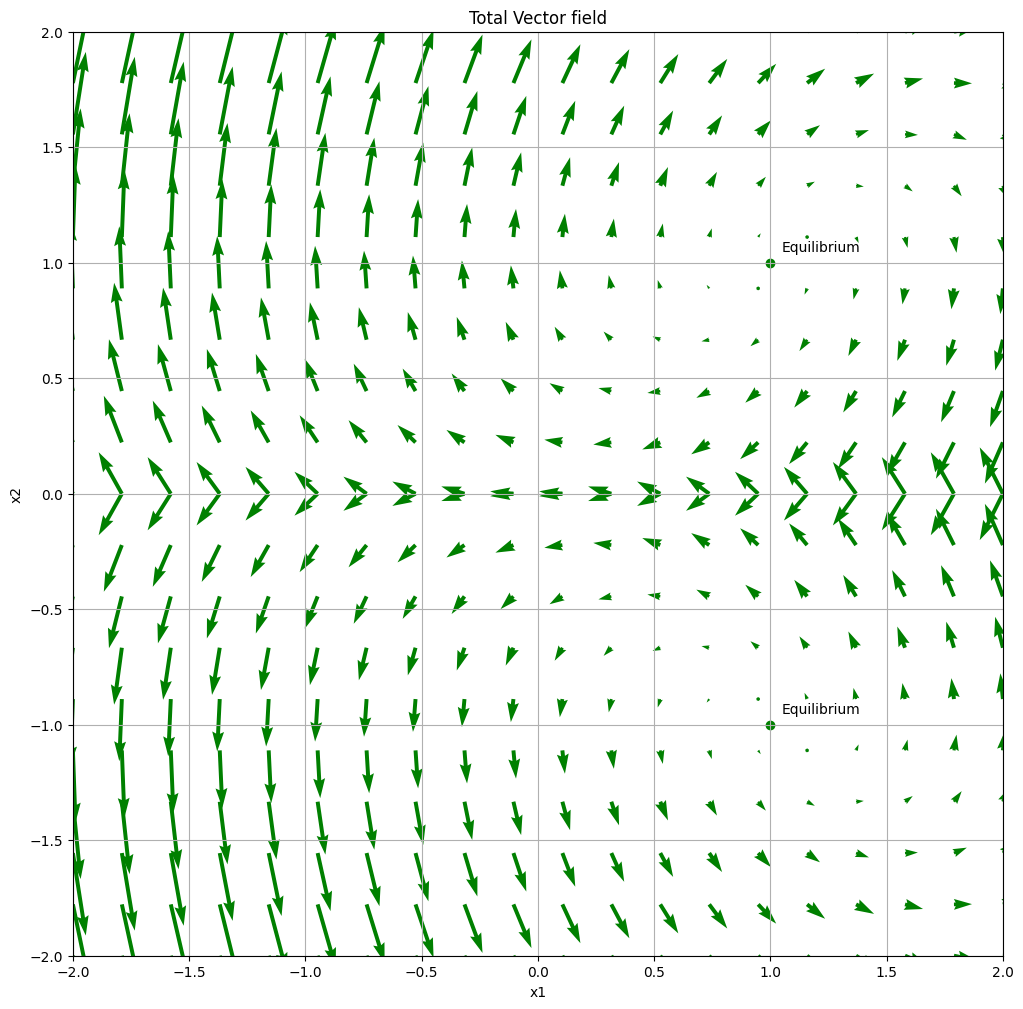

In [34]:
#Trying to get a combination of the two filed onto the same plot.
xpos, ypos= np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(0 , bound, 10)) 
xmin, ymin= np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(-bound, 0, 10)) 

#Update vector fields
#Vector directions for f plus and f minus
uplus = -1 + ypos
vplus = ypos - xpos
umin = -1 - ymin
vmin = xmin + ymin

fig, axs = plt.subplots(1, 1, figsize =(12, 12))

# Plotting Vector Field with QUIVER 
axs.quiver(xpos, ypos, uplus, vplus, color='g') 
axs.quiver(xmin, ymin, umin, vmin, color='g') 
axs.set_title('Total Vector field') 
axs.grid(True)
axs.scatter([1, 1], [1, -1], color = 'g')
axs.annotate("Equilibrium", (1.05, 1.05))
axs.annotate("Equilibrium", (1.05, -0.95))
axs.set_xlabel("x1")
axs.set_ylabel("x2")
# Setting x, y boundary limits 
plt.xlim(-bound, bound) 
plt.ylim(-bound, bound) 
  
# Show plot with grid 
 
plt.show() 

In [35]:
from scipy.integrate import odeint
def xdot(y, t, alpha, eps):
    
    x1, x2 = y
    
    if x2 > eps:
        return [-1 + x2, x2 - x1]
    elif x2 < -eps:
        return [-1 - x2, x1 + x2]
    else:
        return [ alpha *(-1 + x2) + (1 - alpha) * (-1 - x2),
                 alpha *(x2 - x1) + (1 - alpha) * (x2 + x1)]

In [38]:
#define time range
timespan = np.linspace(0, 25, 1000)

#initial conditions
x0 = 0
y0 = 0
initial_conditions = [x0, y0]
alpha = 1
eps = 0.01

#Getting numerical Solution
sol = odeint(xdot, initial_conditions, timespan, args=(alpha, eps))
bound = 30 #PLotting bounds for x and y axis


#Adding a small buffer for which the boundary term will occupy
xpos, ypos= np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(eps , bound, 10)) 
xmin, ymin= np.meshgrid(np.linspace(-bound, bound, 20),  
                   np.linspace(-bound, -eps, 10)) 
xbound, ybound = np.meshgrid(np.linspace(-bound, bound, 200),  
                   np.linspace(-eps, eps, 4))


#Update vector fields
#Vector directions for f plus and f minus
uplus = -1 + ypos
vplus = ypos - xpos
umin = -1 - ymin
vmin = xmin + ymin
ubound = alpha * uplus + (1 - alpha) * umin
vbound = alpha * vplus + (1 - alpha) * vmin

#Picking coords of solution 
x = np.take(sol, 0, axis = 1)
y = np.take(sol, 1, axis = 1)
fig, axs = plt.subplots(1, 1, figsize =(12, 12))

# Plotting Vector Field
axs.quiver(xpos, ypos, uplus, vplus, color='g') 
axs.quiver(xmin, ymin, umin, vmin, color='g') 
#axs.quiver(xbound, ybound, ubound, vbound, color = 'r')
axs.set_title('Total Vector field for alpha = {}'.format(alpha))
axs.grid(True)
axs.scatter([1, 1], [1, -1], color = 'g')
axs.scatter(x, y, color = 'b')
axs.annotate("Equilibrium", (1.05, 1.05))
axs.annotate("Equilibrium", (1.05, -0.95))
axs.annotate("Initial", (x0 - 1, y0 - 0.1))
axs.annotate("Final", (x[-1] - 1, y[-1] + 0.5))

axs.set_xlabel("x1")
axs.set_ylabel("x2")
# Setting x, y boundary limits 
plt.xlim(-bound, bound) 
plt.ylim(-bound, bound) 
  
# Show plot with grid 
 
plt.show() 

In [199]:
plt.plot(sol, color = 'b')